## Student Performance Indicator


#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model
- Evaluate the model & push the model.

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [2]:
import numpy as np  # Import NumPy for numerical operations
import pandas as pd  # Import Pandas for data manipulation
import seaborn as sns  # Import Seaborn for statistical data visualization
import matplotlib.pyplot as plt  # Import Matplotlib for plotting
# Jupyter magic command to display plots inline (only works in Jupyter)
%matplotlib inline
import warnings  # Import the warnings module to manage warning messages
warnings.filterwarnings('ignore')  # Suppress warning messages

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/StudentsPerformance.csv')

#### Show Top 5 Records

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Shape of the dataset

In [4]:
df.shape

(1000, 8)

### 2.2 Dataset information

- gender : sex of students  -> (male/female)
- race/ethnicity : ethnicity of students -> (Group A, B, C, D, E)
- parental level of education : parent's final education ->(bachelor's degree,some college, master's degree, associate's degree, high school)
- lunch : having lunch before the test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 3. Data Checks to perform

- Check missing values
- Check duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values in the data set.

### 3.2 Check Duplicates

In [6]:
df.duplicated().sum()

0

There are no duplicate values ​​in the data set.

### 3.3 Check data types

In [7]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


- There are no misising values ​​in the data set and all the data types are correct.
- We have 3 numerical features: math score, reading score, writing score
- We have 5 categorical features: gender, race/ethnicity, parental level of education, lunch, test preparation course

### 3.4 Checking the number of unique values of each column

In [8]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

### 3.5 Check statistics of data set

In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


##### Insight
- From above description of numerical data, all means are very close to each other - between 66 and 68.05
- All standard deviations are also very close - between 14.6 and 15.19
- While there is a minimum score of 0 for Math, the minimum for Writing is much higher - 10, and for Reading, even higher - 17

### 3.7 Exploring Data

##### Categorical feature information : Method - 1

In [ ]:
print("Categories in 'gender' variable:", df['gender'].unique())
print("Categories in 'race/ethnicity' variable:", df['race/ethnicity'].unique())
print("Categories in 'parental level of education' variable:", df['parental level of education'].unique())
print("Categories in 'lunch' variable:", df['lunch'].unique())
print("Categories in 'test preparation course' variable:", df['test preparation course'].unique())

Categories in 'gender' variable: ['female' 'male']
Categories in 'race/ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable: ['standard' 'free/reduced']
Categories in 'test preparation course' variable: ['none' 'completed']


Method - 2

In [11]:
categorical_columns = [
    'gender', 
    'race/ethnicity', 
    'parental level of education', 
    'lunch', 
    'test preparation course'
]

for col in categorical_columns:
    print(f"Categories in '{col}' variable: {df[col].unique()}")

Categories in 'gender' variable: ['female' 'male']
Categories in 'race/ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable: ['standard' 'free/reduced']
Categories in 'test preparation course' variable: ['none' 'completed']


##### Numerical & Categorical columns

In [12]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print(f'We have {len(numeric_features)} numerical features: {numeric_features}')
print(f'\nWe have {len(categorical_features)} categorical features: {categorical_features}')

We have 3 numerical features: ['math score', 'reading score', 'writing score']

We have 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


### 3.8 Dependent Feature: Adding columns for "Total Score" and "Average"

In [13]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [14]:
reading_full = df[df['reading score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()
math_full = df[df['math score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Reading: {reading_full}')
print(f'Number of students with full marks in Writing: {writing_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Reading: 17
Number of students with full marks in Writing: 14


##### Identify students who may have failed in each subject.

In [15]:
reading_less_33 = df[df['reading score'] < 33]['average'].count()
writing_less_33 = df[df['writing score'] < 33]['average'].count()
math_less_33 = df[df['math score'] < 33]['average'].count()

print(f'Number of students with less than 33 marks in Maths: {math_less_33}')
print(f'Number of students with less than 33 marks in Writing: {writing_less_33}')
print(f'Number of students with less than 33 marks in Reading: {reading_less_33}')

Number of students with less than 33 marks in Maths: 19
Number of students with less than 33 marks in Writing: 12
Number of students with less than 33 marks in Reading: 11


#####  Insights
 - From the above values ​​we get to know that students have performed worst in maths
 - Best performance is in reading section

### 4. Exploring Data (Visualization)
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

- With respect to average scores

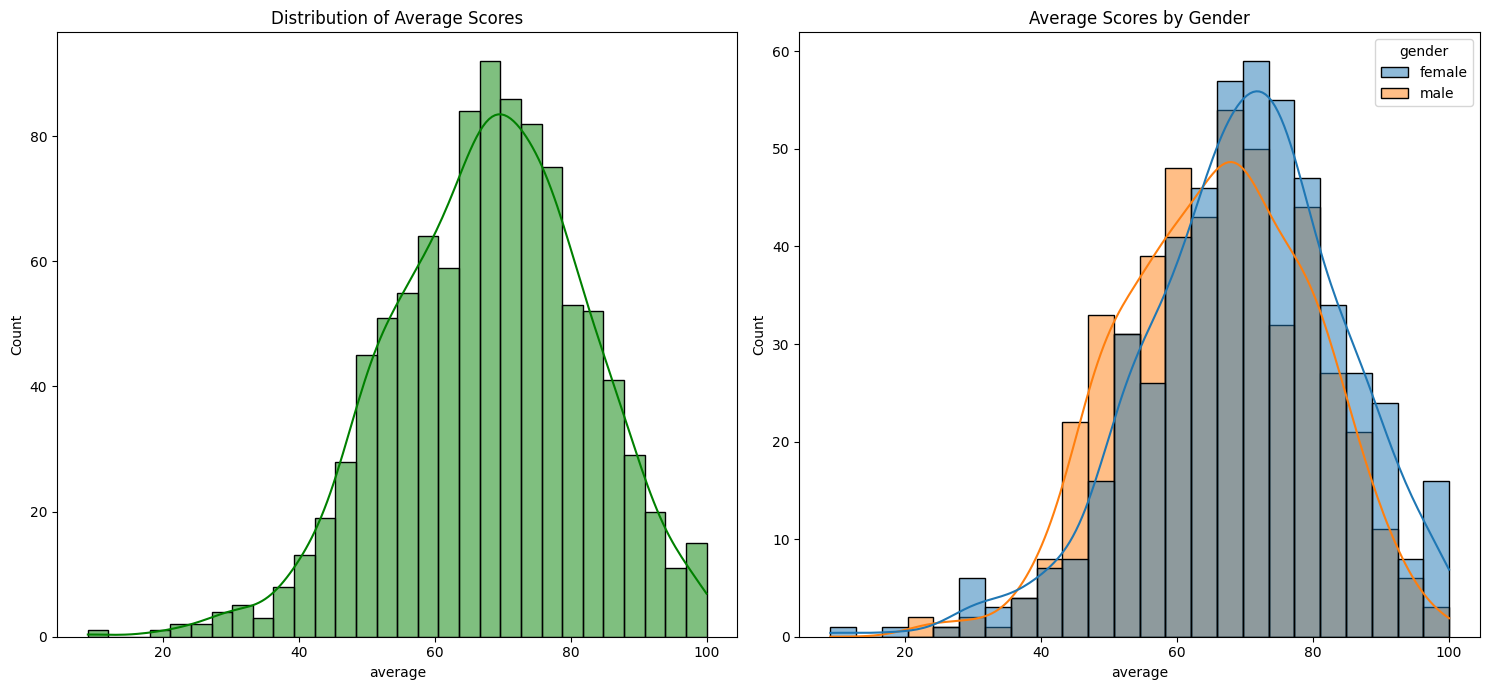

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# First subplot: Histogram of average scores
sns.histplot(data=df, x='average', bins=30, kde=True, color='g', ax=axs[0])
axs[0].set_title('Distribution of Average Scores')

# Second subplot: Histogram of average scores by gender
sns.histplot(data=df, x='average', kde=True, hue='gender', ax=axs[1])
axs[1].set_title('Average Scores by Gender')

plt.tight_layout()
plt.show()

- With respect to total scores

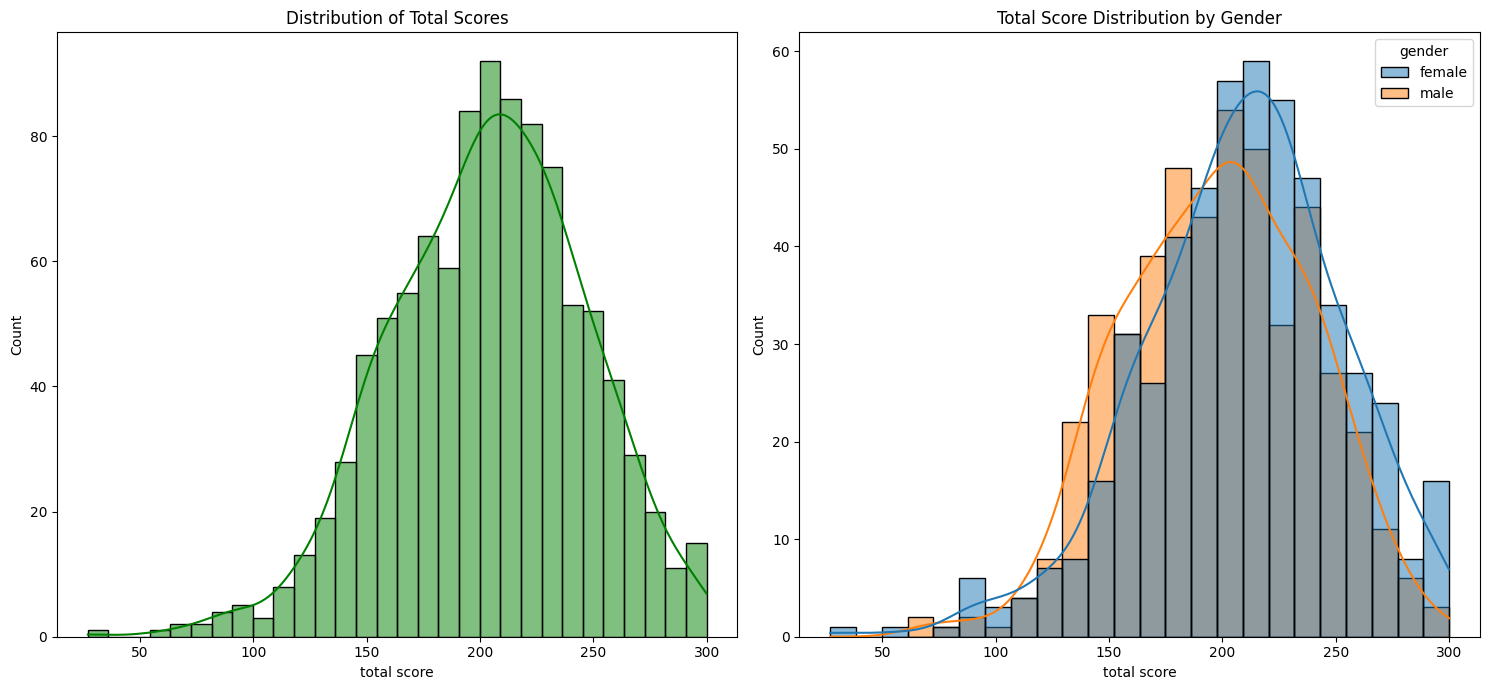

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# First subplot: Total score distribution
sns.histplot(data=df, x='total score', bins=30, kde=True, color='g', ax=axs[0])
axs[0].set_title('Distribution of Total Scores')

# Second subplot: Total score by gender
sns.histplot(data=df, x='total score', kde=True, hue='gender', ax=axs[1])
axs[1].set_title('Total Score Distribution by Gender')

plt.tight_layout()
plt.show()

- Insights: Female students tend to perform well then male students.

Create three histograms comparing the distribution of average scores based on lunch status, split across all students, female students, and male students.

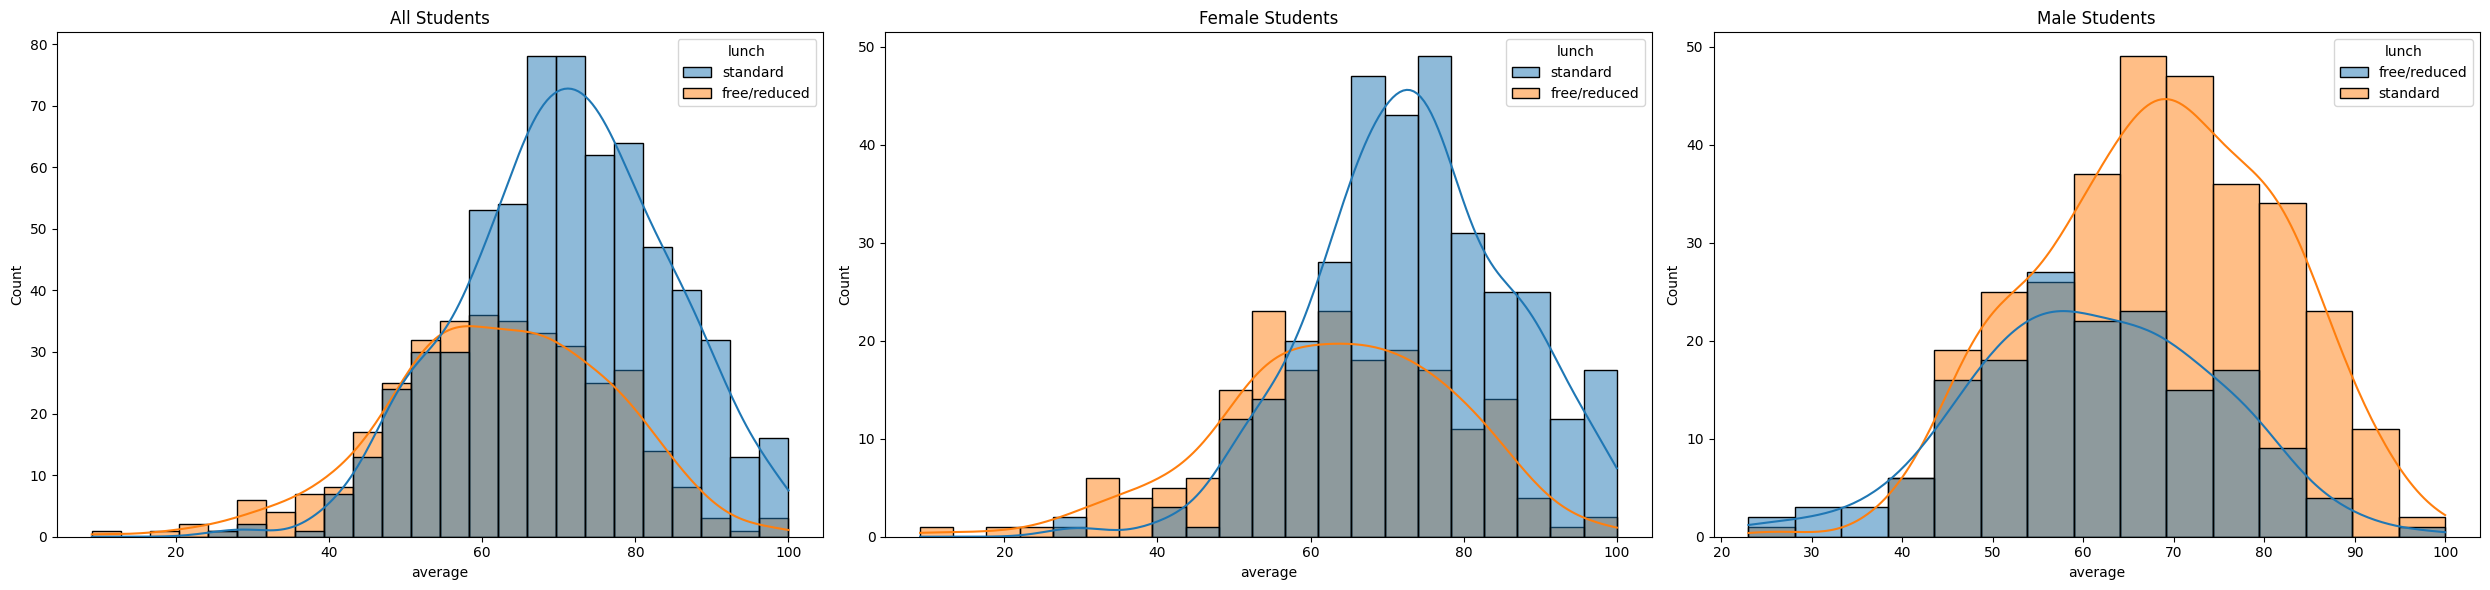

In [18]:
fig, axs = plt.subplots(1, 3, figsize=(25, 6))

# All students
sns.histplot(data=df, x='average', kde=True, hue='lunch', ax=axs[0])
axs[0].set_title('All Students')

# Female students
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='lunch', ax=axs[1])
axs[1].set_title('Female Students')

# Male students
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='lunch', ax=axs[2])
axs[2].set_title('Male Students')

plt.tight_layout()
plt.show()

#####  Insights: 
- Standard lunch helps perform well in exams.
- Standard lunch helps to perform well in exam, be it male or female.

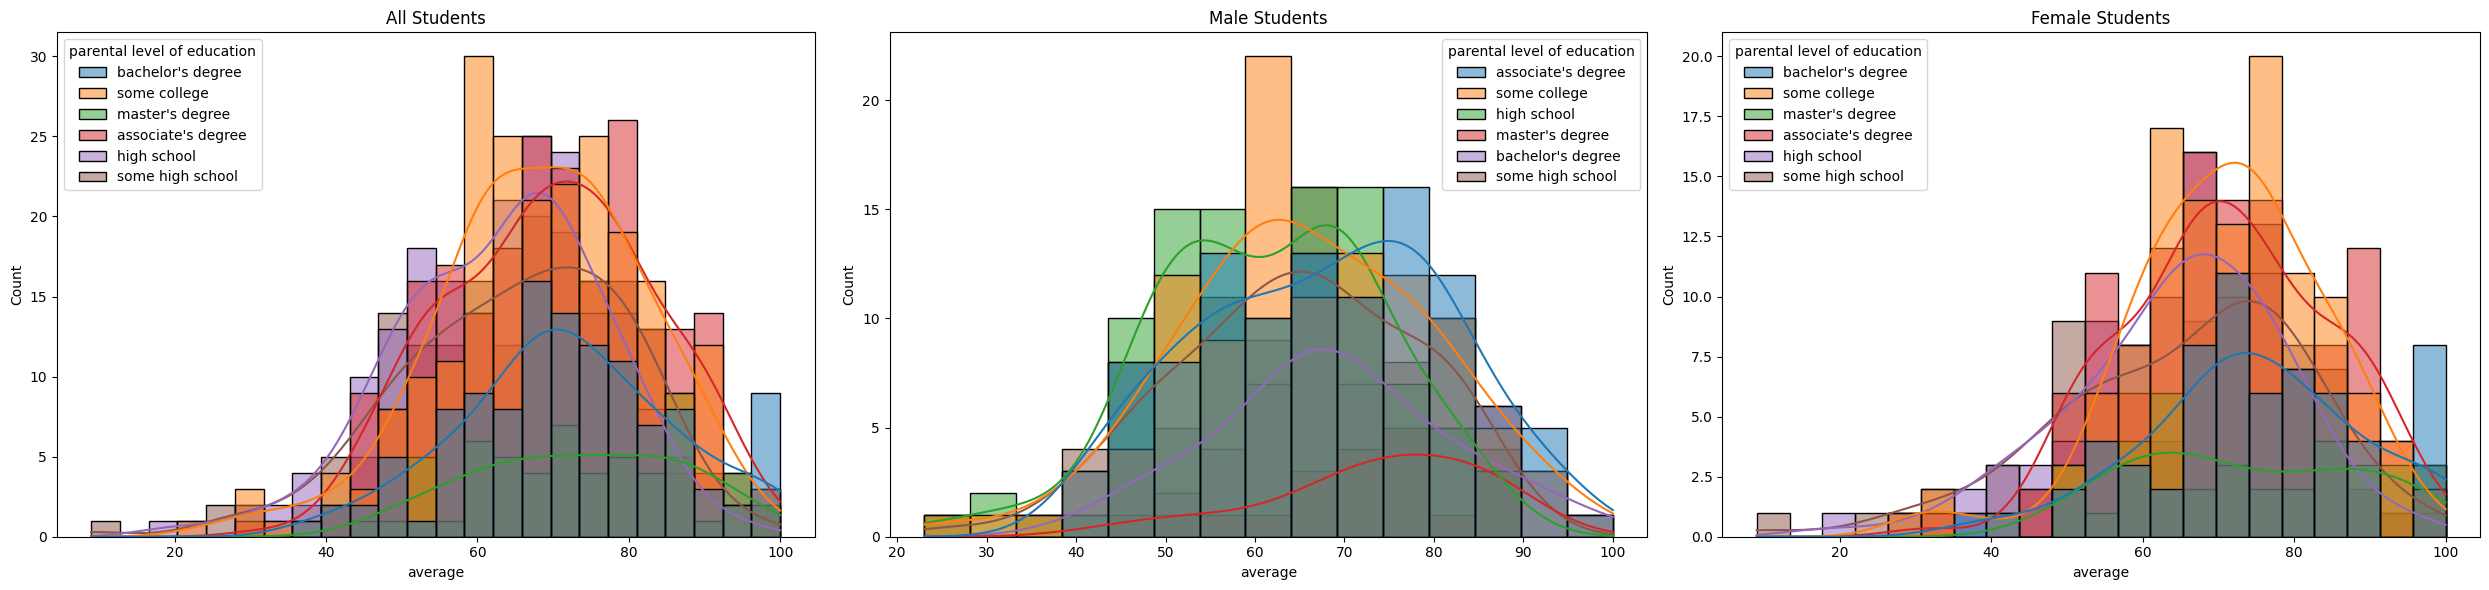

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(25, 6))

# All students
sns.histplot(data=df, x='average', kde=True, hue='parental level of education', ax=axs[0])
axs[0].set_title('All Students')

# Male students
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='parental level of education', ax=axs[1])
axs[1].set_title('Male Students')

# Female students
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='parental level of education', ax=axs[2])
axs[2].set_title('Female Students')

plt.tight_layout()
plt.show()

#####  Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam.
- 3rd plot we can see there is no effect of parent's education on female students.

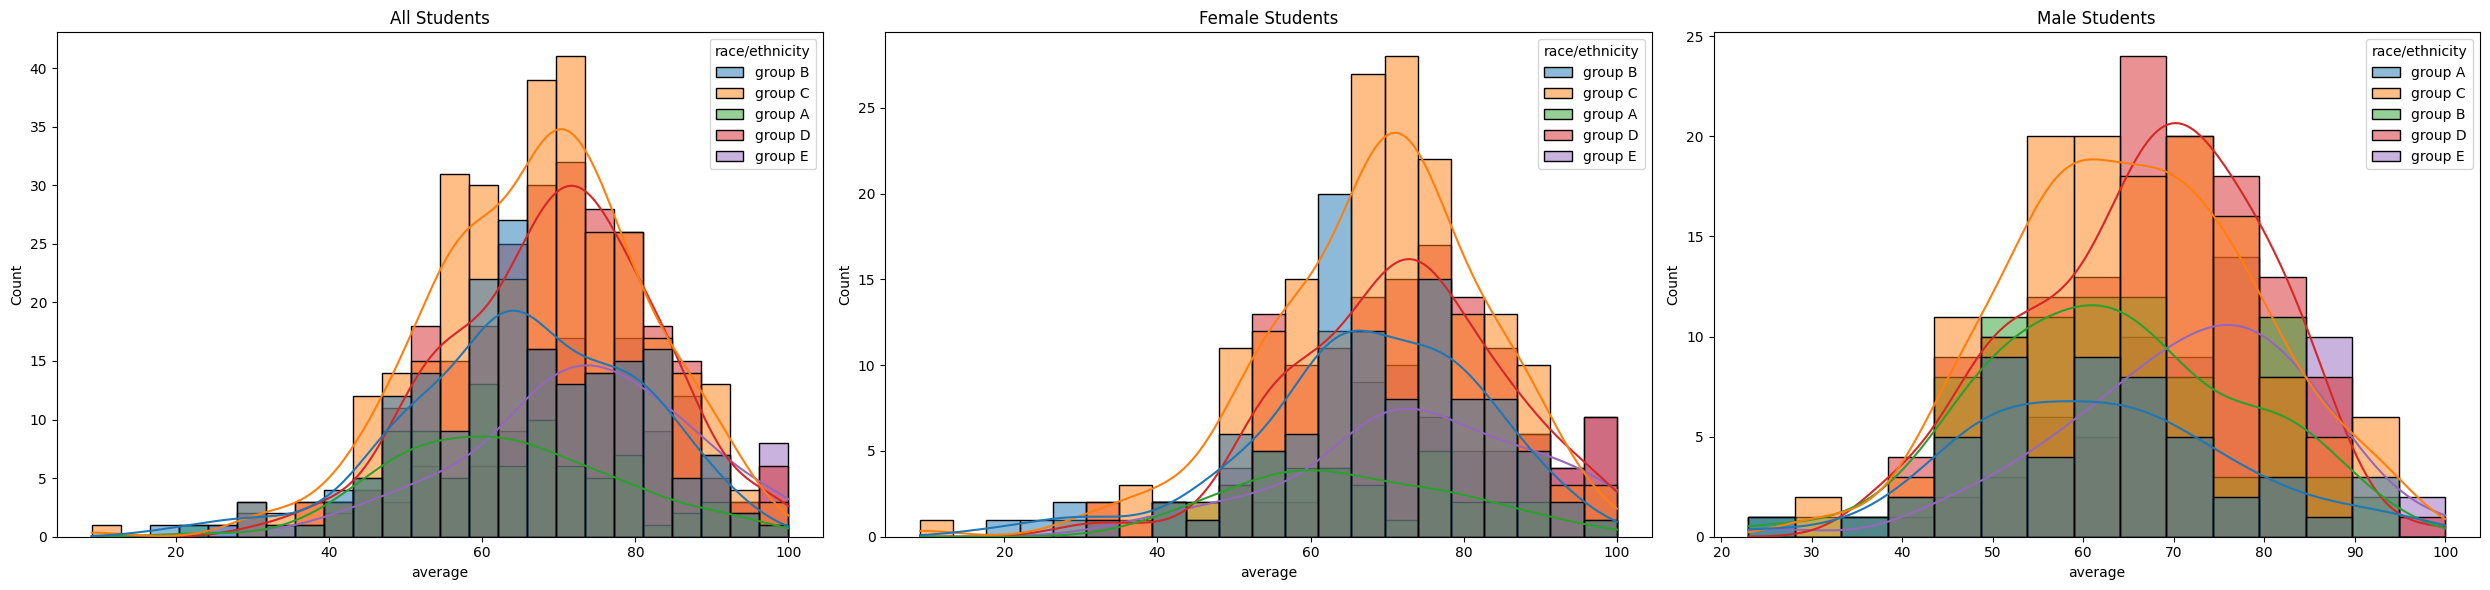

In [20]:
fig, axs = plt.subplots(1, 3, figsize=(25, 6))

# All students
sns.histplot(data=df, x='average', kde=True, hue='race/ethnicity', ax=axs[0])
axs[0].set_title('All Students')

# Female students
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='race/ethnicity', ax=axs[1])
axs[1].set_title('Female Students')

# Male students
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='race/ethnicity', ax=axs[2])
axs[2].set_title('Male Students')

plt.tight_layout()
plt.show()


#####  Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female.

#### 4.2 Maximumum score of students in all three subjects

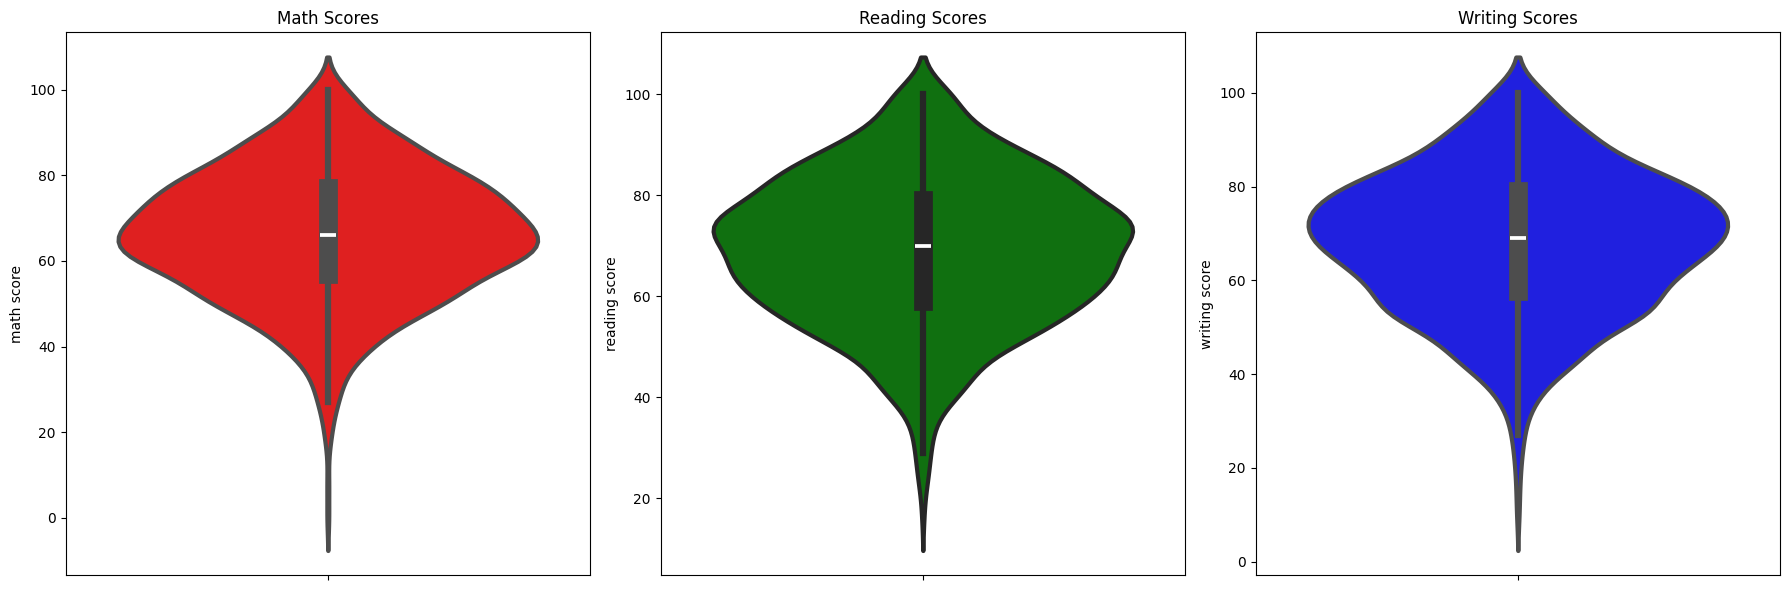

In [21]:
plt.figure(figsize=(18, 6))

# Math Scores
plt.subplot(1, 3, 1)
plt.title('Math Scores')
sns.violinplot(y='math score', data=df, color='red', linewidth=3)

# Reading Scores
plt.subplot(1, 3, 2)
plt.title('Reading Scores')
sns.violinplot(y='reading score', data=df, color='green', linewidth=3)

# Writing Scores
plt.subplot(1, 3, 3)
plt.title('Writing Scores')
sns.violinplot(y='writing score', data=df, color='blue', linewidth=3)

plt.tight_layout()
plt.show()

#### Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

#### 4.3 Multivariate analysis using pieplot

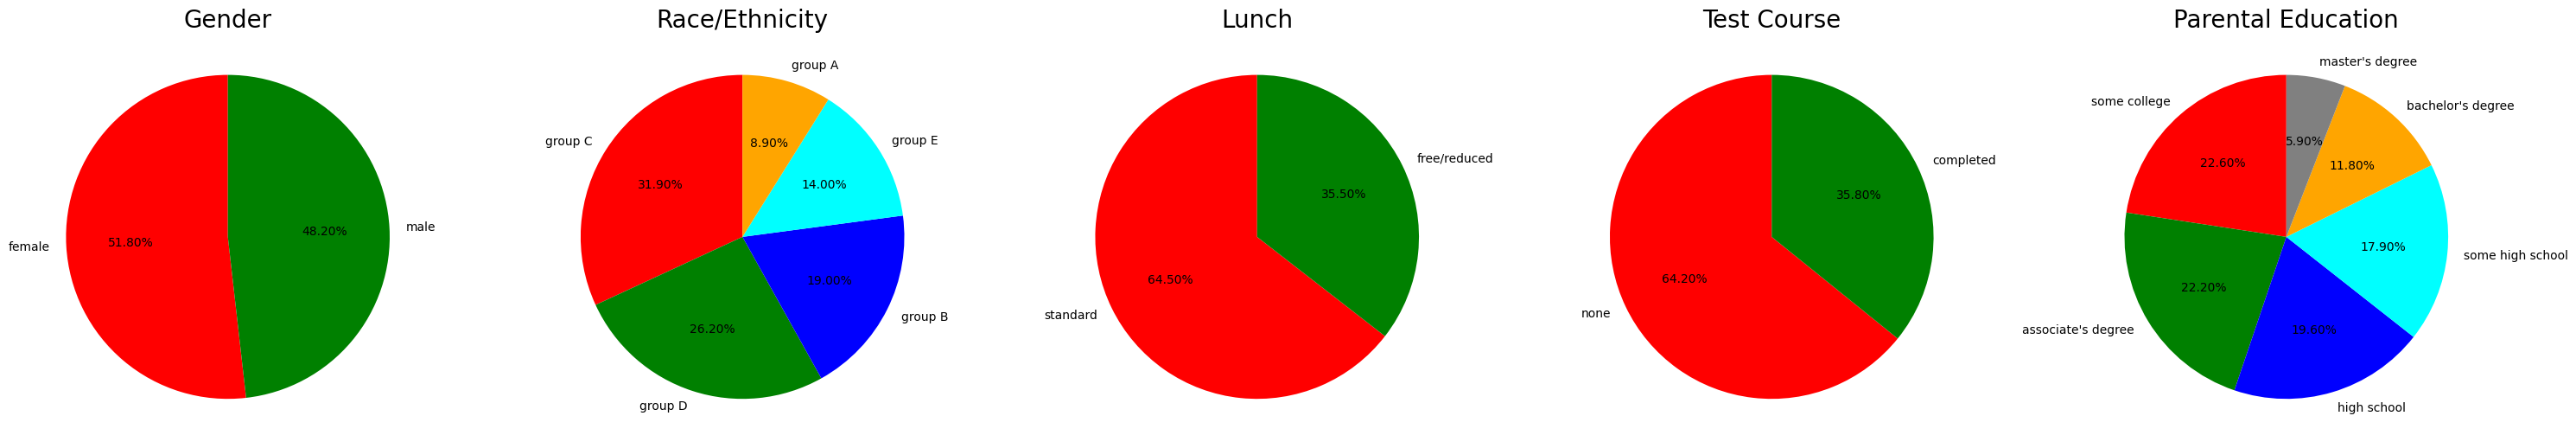

In [22]:
plt.rcParams['figure.figsize'] = (30, 12)

# Gender
plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = size.index
colors = ['red', 'green']
plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%', startangle=90)
plt.title('Gender', fontsize=20)
plt.axis('off')

# Race/Ethnicity
plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = size.index
colors = ['red', 'green', 'blue', 'cyan', 'orange']
plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%', startangle=90)
plt.title('Race/Ethnicity', fontsize=20)
plt.axis('off')

# Lunch
plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = size.index
colors = ['red', 'green']
plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%', startangle=90)
plt.title('Lunch', fontsize=20)
plt.axis('off')

# Test Preparation Course
plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = size.index
colors = ['red', 'green']
plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%', startangle=90)
plt.title('Test Course', fontsize=20)
plt.axis('off')

# Parental Level of Education
plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = size.index
colors = ['red', 'green', 'blue', 'cyan', 'orange', 'grey']
plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%', startangle=90)
plt.title('Parental Education', fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.show()

#####  Insights
- The number of male and female students is almost equal
- Group C has the highest number of students
- The number of students taking standard lunch is higher
- The number of students not enrolled in any test preparation course is higher
- The number of students pursuing education in "some college" is higher, followed by "associate degree".

#### 4.4 Feature Wise Visualization
#### 4.4.1 GENDER Column
- How is distribution of Gender?
- Is gender has any impact on student's performance?

#### Univariate Analysis (How is distribution of Gender?)

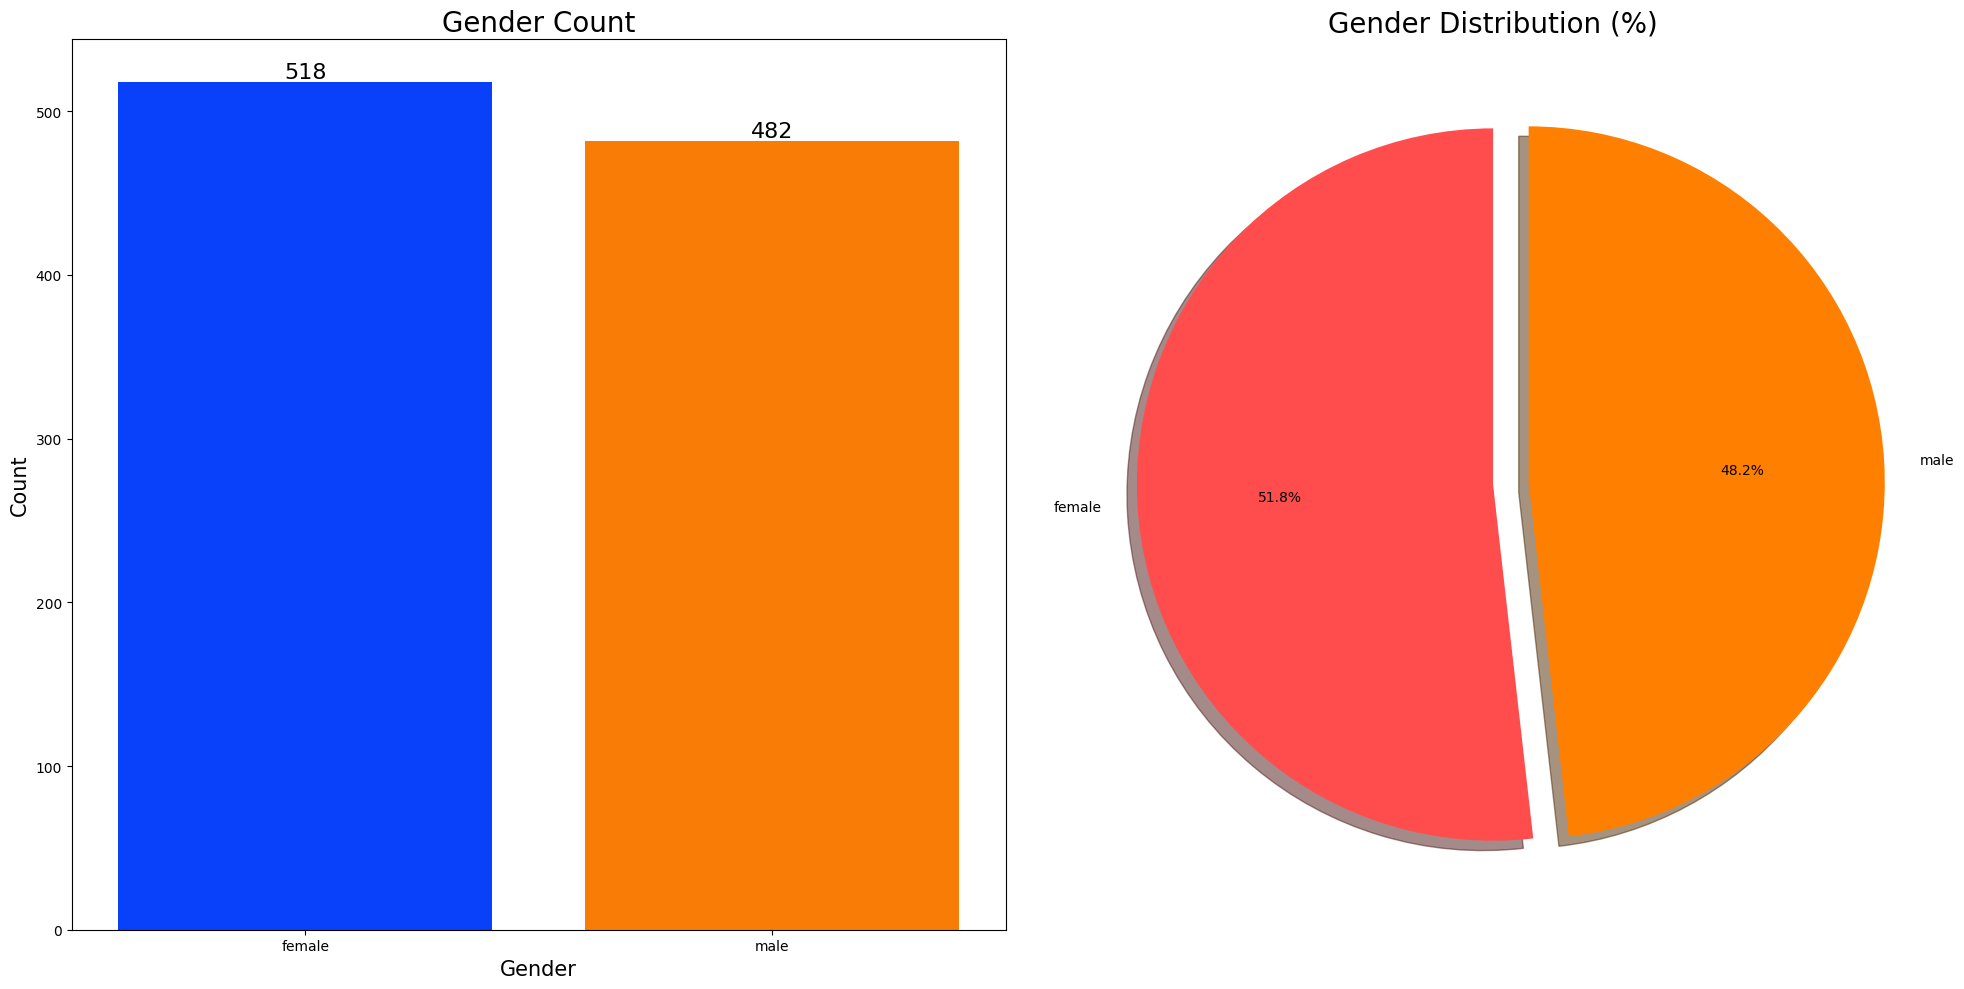

In [23]:
# Create 1 row, 2 column subplot
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# Countplot (Bar plot) on the first subplot
sns.countplot(x='gender', data=df, palette='bright', ax=ax[0], saturation=0.95)
ax[0].set_title('Gender Count', fontsize=20)
ax[0].set_xlabel('Gender', fontsize=15)
ax[0].set_ylabel('Count', fontsize=15)

# Add bar labels
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=16)

# Pie chart on the second subplot
gender_counts = df['gender'].value_counts()
ax[1].pie(
    x=gender_counts,
    labels=gender_counts.index,
    explode=[0, 0.1],
    autopct='%1.1f%%',
    shadow=True,
    colors=['#ff4d4d', '#ff8000'],
    startangle=90
)
ax[1].set_title('Gender Distribution (%)', fontsize=20)

plt.tight_layout()
plt.show()

#### Insights 
- Gender has balanced data with 518 (51.8%) female students and 482 (48.2%) male students

#### Bivariate Analysis (Is gender has any impact on student's performance?) 

In [24]:
gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group

,math score,reading score,writing score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


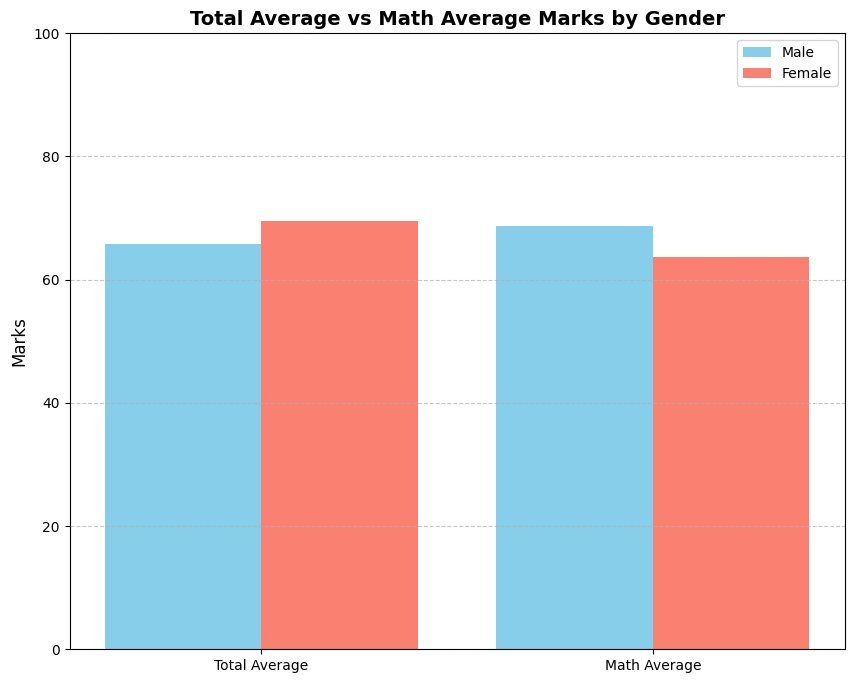

In [25]:
plt.figure(figsize=(10, 8))

X = ['Total Average', 'Math Average']

female_scores = [gender_group.loc['female', 'average'], gender_group.loc['female', 'math score']]
male_scores = [gender_group.loc['male', 'average'], gender_group.loc['male', 'math score']]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label='Male', color='skyblue')
plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female', color='salmon')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks", fontsize=12)
plt.title("Total Average vs Math Average Marks by Gender", fontweight='bold', fontsize=14)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 100)  # optional for clarity

plt.show()

#### Insights 
- On an average females have a better overall score than men.
- whereas males have scored higher in maths.

#### 4.4.2 RACE/EHNICITY Column
- How is Group wise distribution?
- Is Race/Ehnicity has any impact on student's performance?

#### Univariate Analysis (How is Group wise distribution?)

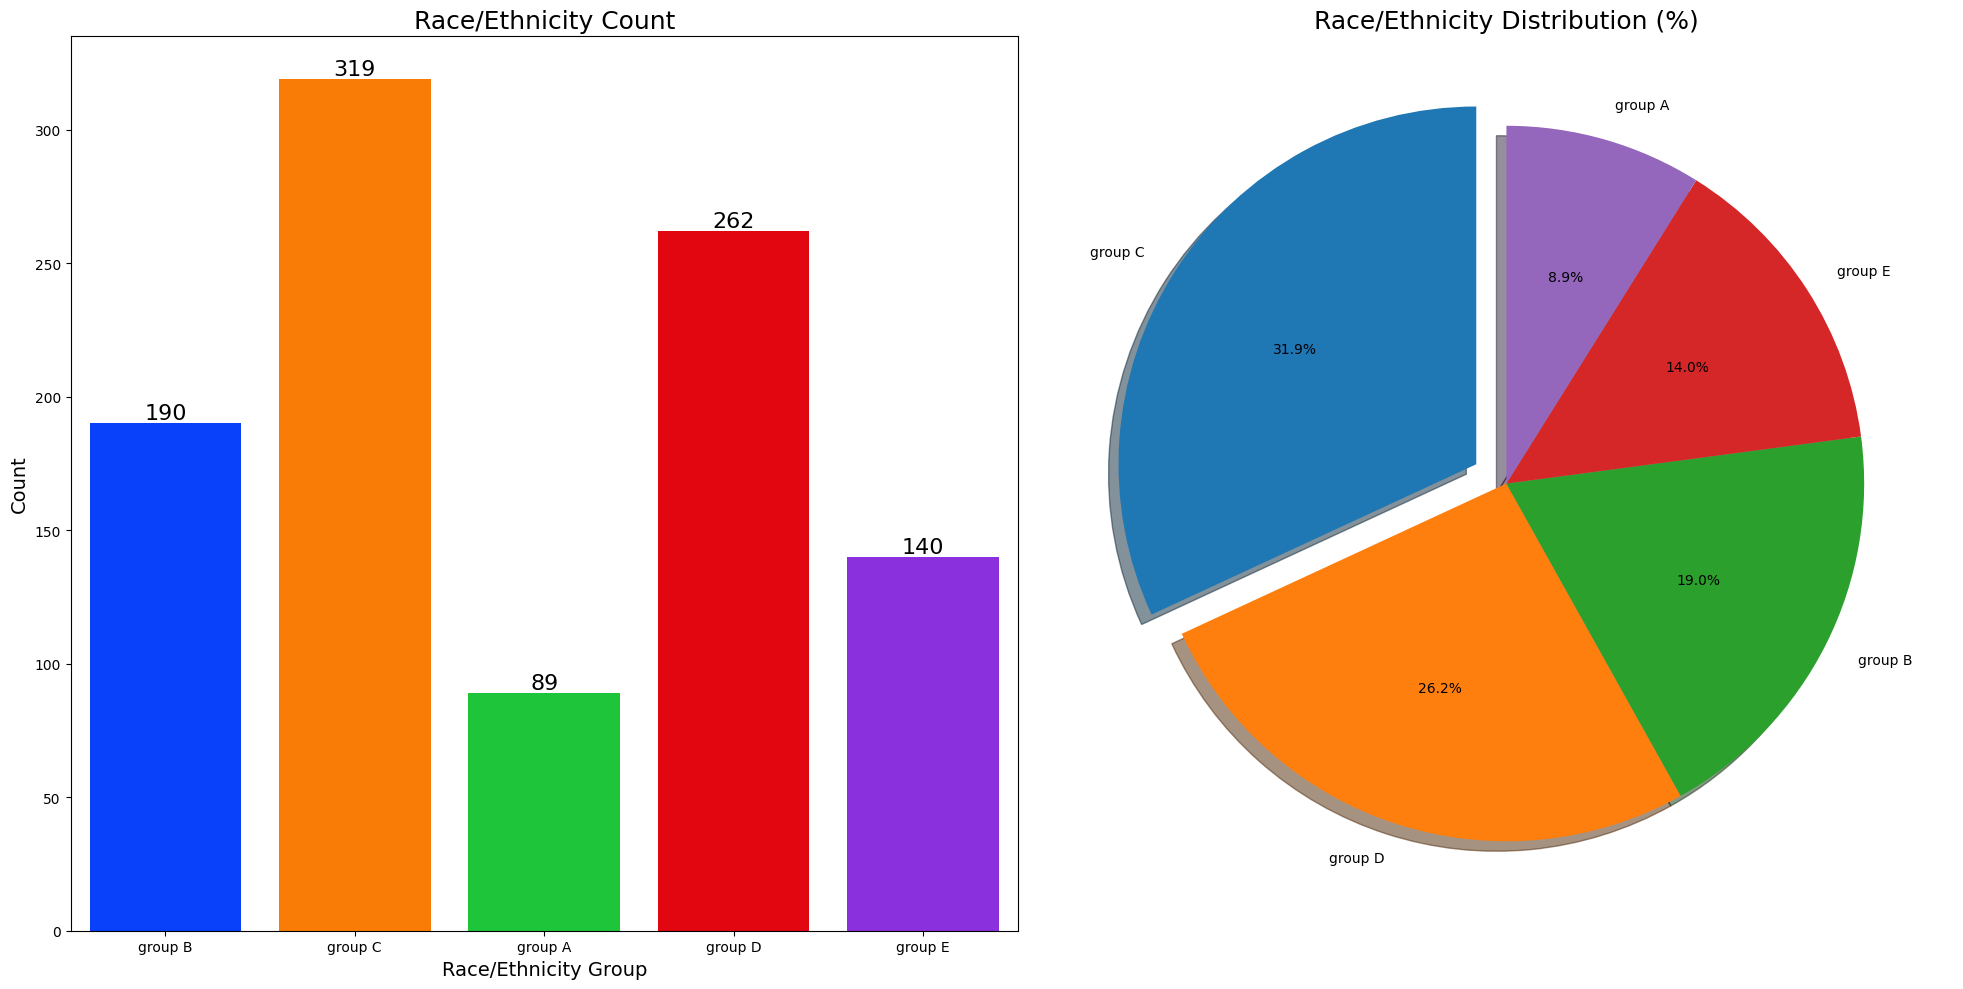

In [26]:
# Create 1 row, 2 columns of subplots
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Bar plot of race/ethnicity counts
sns.countplot(x='race/ethnicity', data=df, palette='bright', ax=ax[0], saturation=0.95)
ax[0].set_title('Race/Ethnicity Count', fontsize=18)
ax[0].set_xlabel('Race/Ethnicity Group', fontsize=14)
ax[0].set_ylabel('Count', fontsize=14)

# Add count labels on top of bars
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=16)

# Pie chart using the second subplot (ax[1])
race_counts = df['race/ethnicity'].value_counts()
ax[1].pie(
    x=race_counts,
    labels=race_counts.index,
    explode=[0.1, 0, 0, 0, 0],
    autopct='%1.1f%%',
    shadow=True,
    startangle=90
)
ax[1].set_title('Race/Ethnicity Distribution (%)', fontsize=18)

plt.tight_layout()
plt.show()

#### Insights 
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

#### Bivariate Analysis ( Is Race/Ehnicity has any impact on student's performance ? )

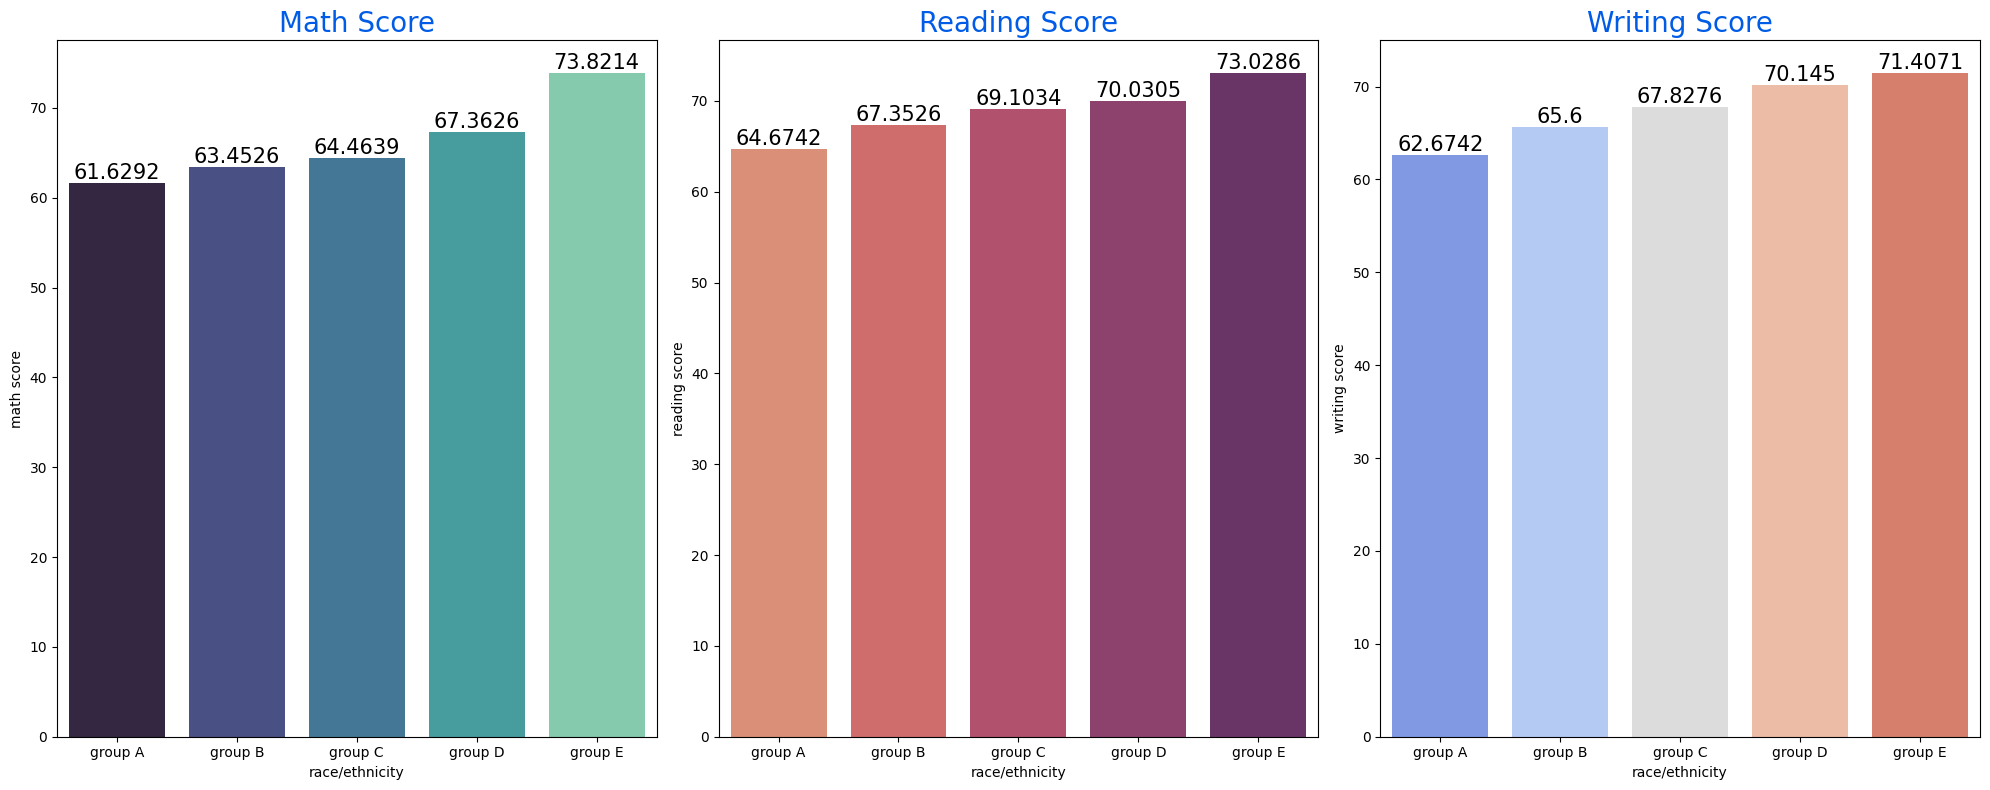

In [27]:
# Grouping by race/ethnicity and calculating mean scores
grouped_scores = df.groupby('race/ethnicity')[['math score', 'reading score', 'writing score']].mean()

# Plotting
f, ax = plt.subplots(1, 3, figsize=(20, 8))

# Math Score
sns.barplot(x=grouped_scores.index, y=grouped_scores['math score'], palette='mako', ax=ax[0])
ax[0].set_title('Math Score', color='#005ce6', size=20)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

# Reading Score
sns.barplot(x=grouped_scores.index, y=grouped_scores['reading score'], palette='flare', ax=ax[1])
ax[1].set_title('Reading Score', color='#005ce6', size=20)
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)

# Writing Score
sns.barplot(x=grouped_scores.index, y=grouped_scores['writing score'], palette='coolwarm', ax=ax[2])
ax[2].set_title('Writing Score', color='#005ce6', size=20)
for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=15)

plt.tight_layout()
plt.show()

#### Insights 
- Group E students have scored the highest marks. 
- Group A students have scored the lowest marks. 
- Students from a lower socioeconomic status have a lower avg in all course subjects.

#### 4.4.3 PARENTAL LEVEL OF EDUCATION Column
- What is educational background of student's parent?
- Is parental education has any impact on student's performance?

#### Univariate Analysis (What is educational background of student's parent?)

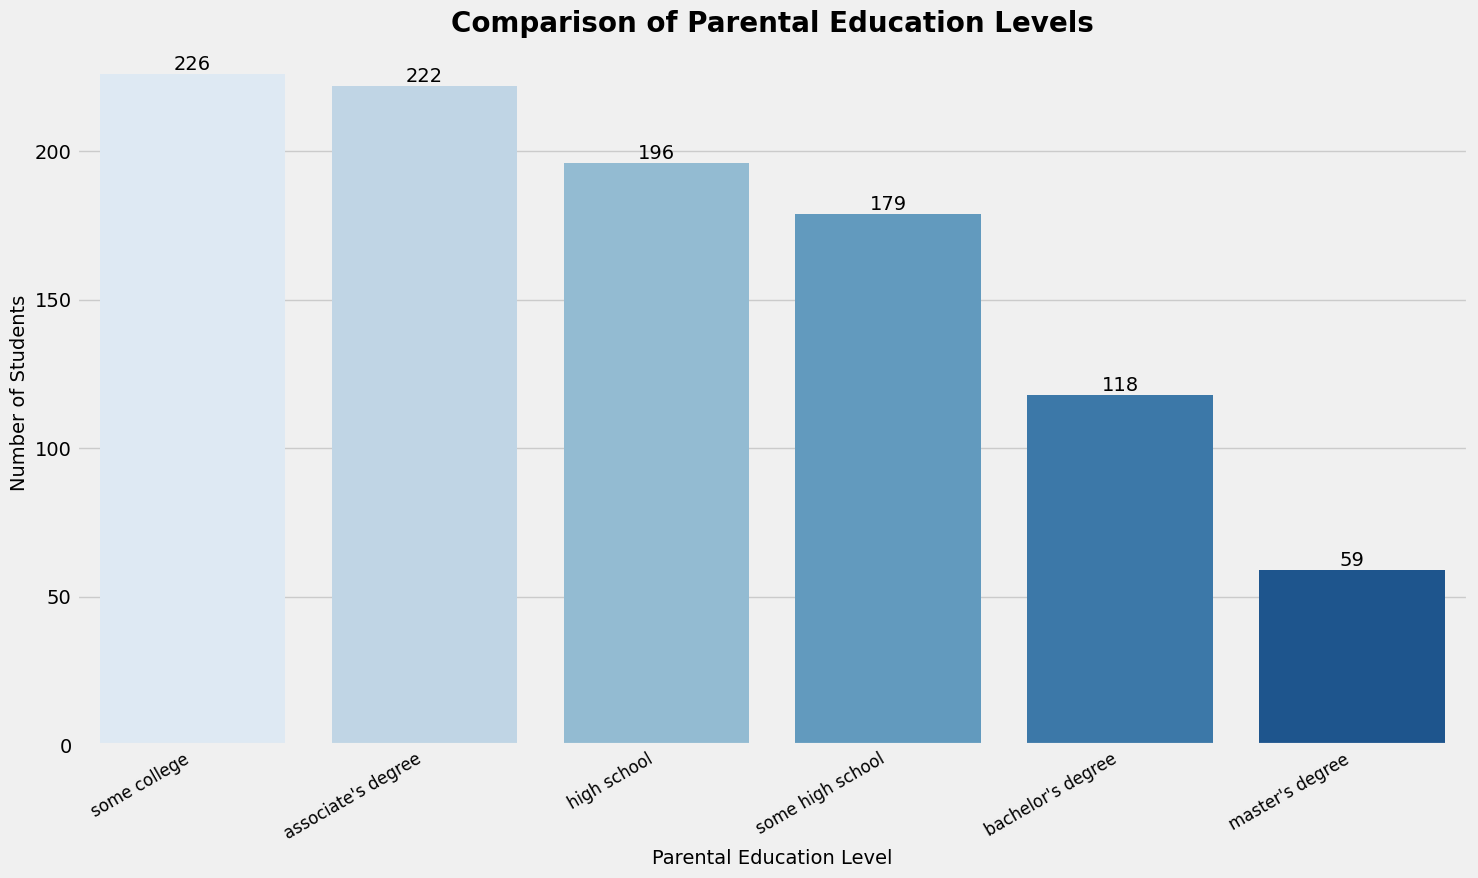

In [28]:
# Set figure size and style
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

# Create the countplot with sorted categories
ax = sns.countplot(
    x='parental level of education',
    data=df,
    order=df['parental level of education'].value_counts().index,  # Sort by count
    palette='Blues'
)

# Add title and labels
plt.title('Comparison of Parental Education Levels', fontweight='bold', fontsize=20)
plt.xlabel('Parental Education Level', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)

# Rotate x-tick labels for better readability
plt.xticks(rotation=30, ha='right', fontsize=12)

# Add count labels on top of bars
for container in ax.containers:
    ax.bar_label(container, size=14, color='black')

plt.tight_layout()
plt.show()


#### Insights 
- Largest number of parents are from some college.

#### Bivariate Analysis (Is parental education has any impact on student's performance?)

List of all numeric columns:

In [29]:
print(df.select_dtypes(include='number').columns)


Index(['math score', 'reading score', 'writing score', 'total score',
       'average'],
      dtype='object')


Restrict the aggregation to needed numeric columns only

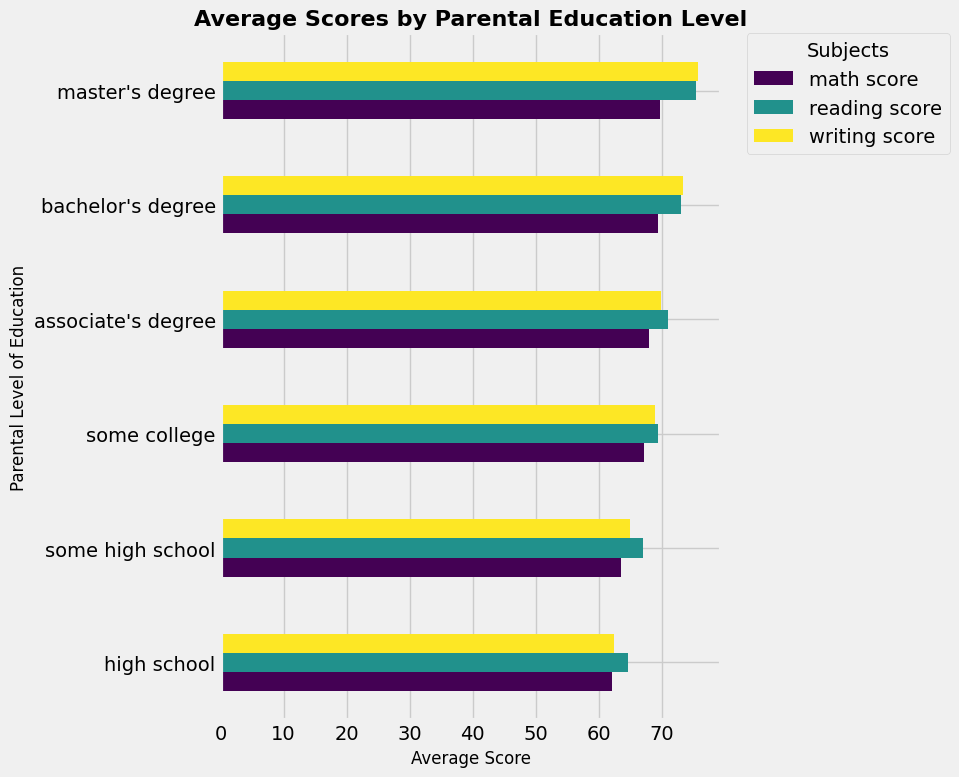

In [30]:
# Group by parental education and compute average scores
avg_scores = df.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean()

# Sort the index for better visual ordering (optional)
avg_scores = avg_scores.sort_values(by='math score', ascending=True)

# Plot horizontal bar chart
ax = avg_scores.plot(kind='barh', figsize=(10, 8), colormap='viridis')

# Add titles and labels
plt.title('Average Scores by Parental Education Level', fontsize=16, fontweight='bold')
plt.xlabel('Average Score', fontsize=12)
plt.ylabel('Parental Level of Education', fontsize=12)

# Move legend to the right of the plot
plt.legend(title='Subjects', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.tight_layout()
plt.show()

Optional: Automatically use all numeric columns

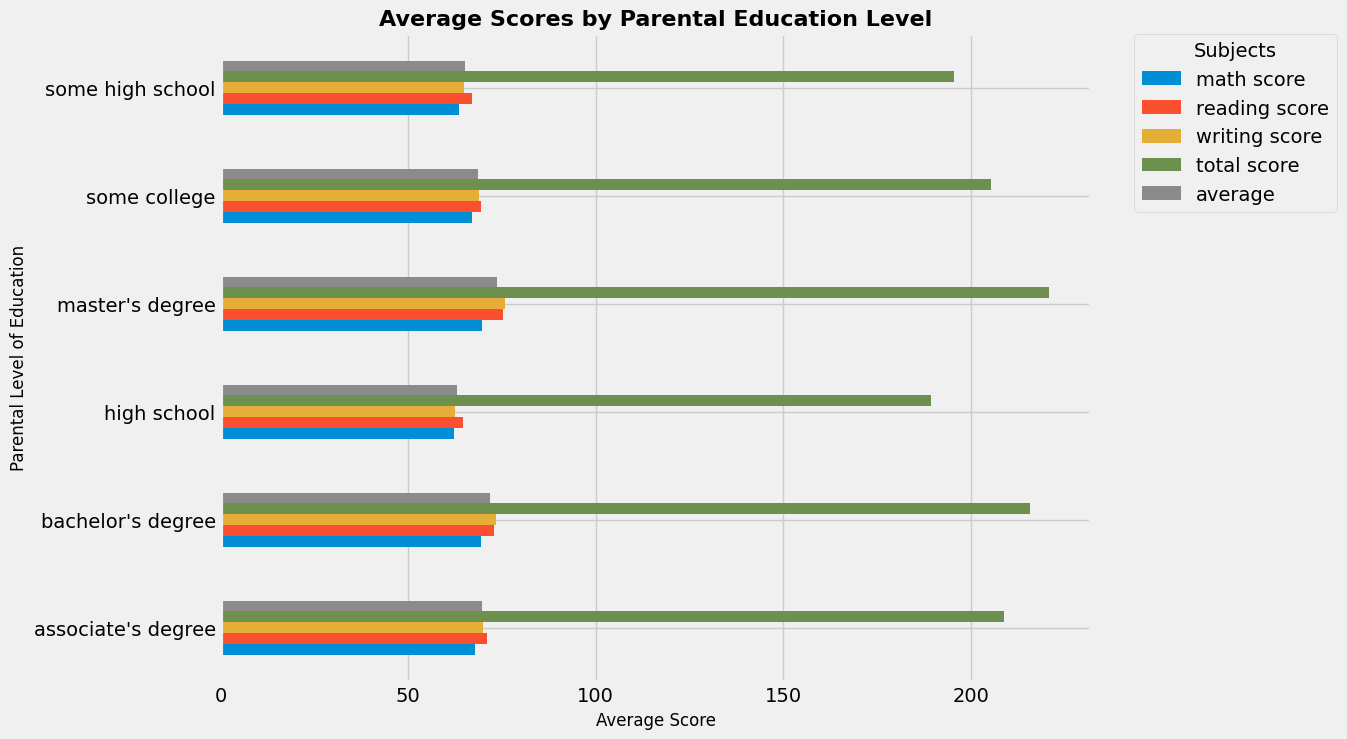

In [31]:
df.groupby('parental level of education').mean(numeric_only=True).plot(kind='barh', figsize=(10, 8))

# Add titles and labels
plt.title('Average Scores by Parental Education Level', fontsize=16, fontweight='bold')
plt.xlabel('Average Score', fontsize=12)
plt.ylabel('Parental Level of Education', fontsize=12)

# Move legend to the right of the plot
plt.legend(title='Subjects', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

#### Insights 
- Students whose parents have master's and bachelor's level education have higher marks than others.

#### 4.4.4 LUNCH Column
- Which type of lunch is most common amoung students?
- What is the effect of lunch type on student's performance?
- Does parental education have any impact on the type of lunch?


#### Univariate Analysis (Which type of lunch is most common amoung students?)

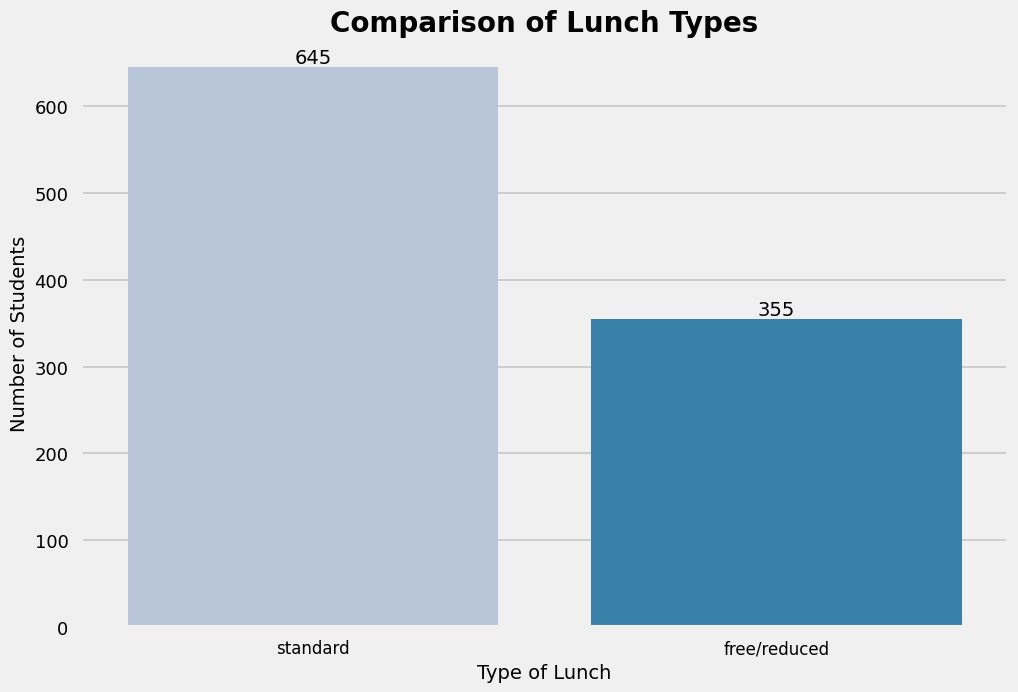

In [32]:
# Set figure size and plot style
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')

# Create countplot for lunch types
ax = sns.countplot(x='lunch', data=df, palette='PuBu')

# Add title and axis labels
plt.title('Comparison of Lunch Types', fontsize=20, fontweight='bold')
plt.xlabel('Type of Lunch', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)

# Add count labels above each bar
for container in ax.containers:
    ax.bar_label(container, size=14, color='black')

# Optional: style x-axis ticks
plt.xticks(fontsize=12)
plt.tight_layout()
plt.show()

#### Insights 
- Students being served standard lunch was more than free lunch.

#### Bivariate Analysis (Is lunch type intake has any impact on student's performance?)

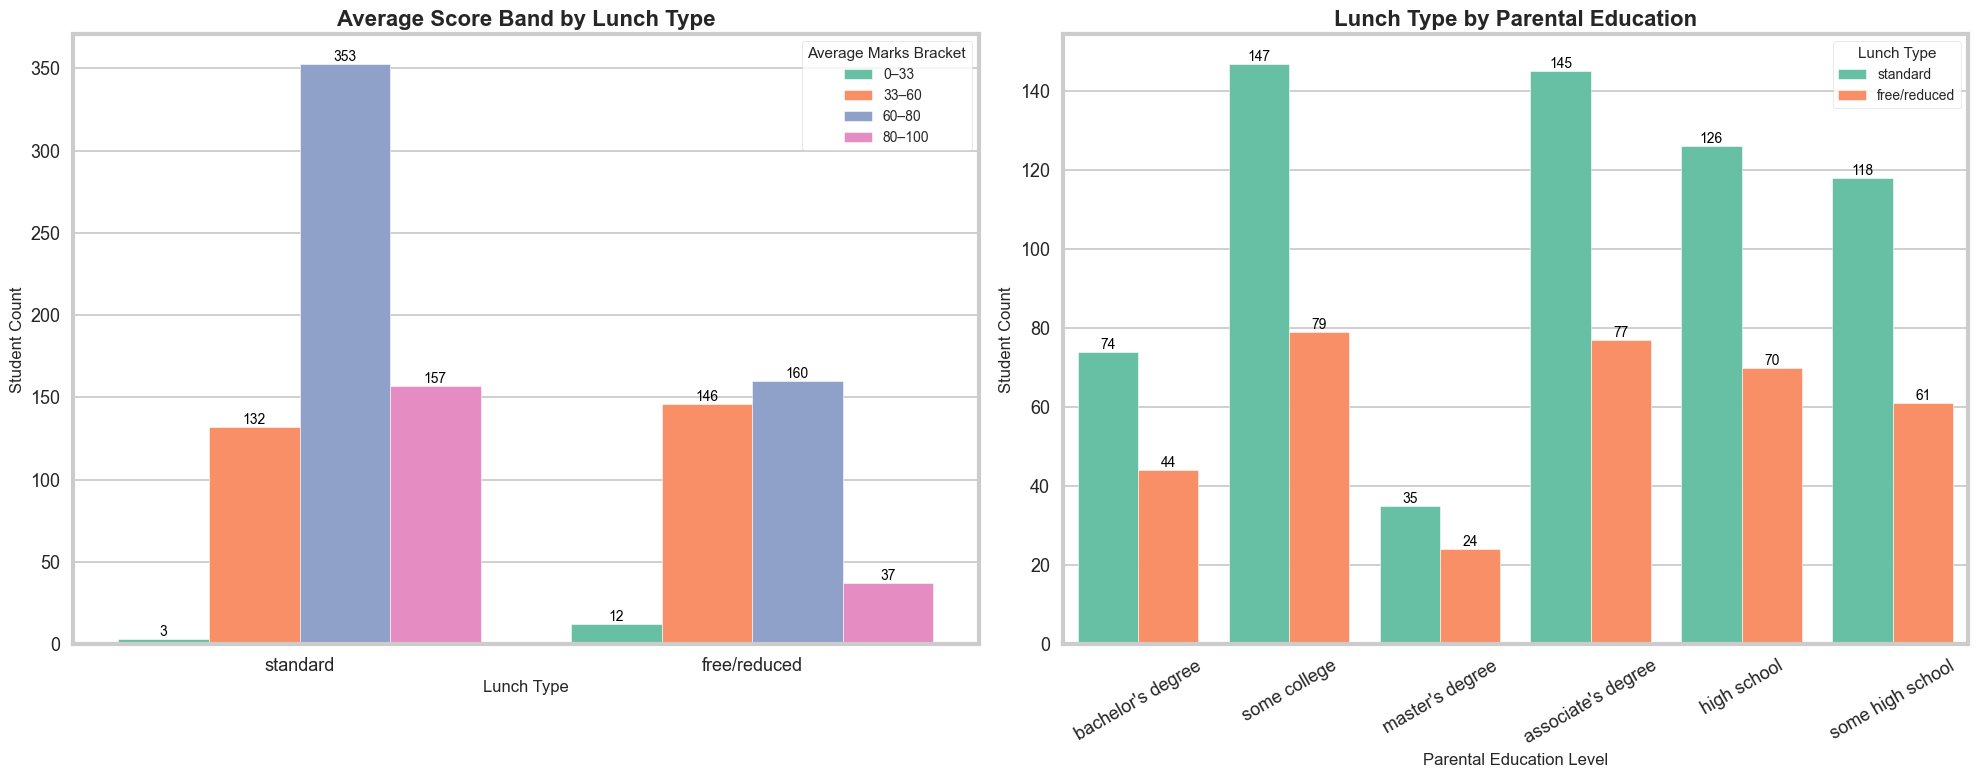

In [33]:
# Categorize 'average' into score brackets
score_labels = ['0–33', '33–60', '60–80', '80–100']
df['average_bracket'] = pd.cut(
    df['average'],
    bins=[0, 33, 60, 80, 100],
    labels=score_labels,
    include_lowest=True
)
df['average_bracket'] = pd.Categorical(df['average_bracket'], categories=score_labels, ordered=True)

# Set seaborn style
sns.set_style("whitegrid")
sns.set_palette("Set2")

# Create subplots: 1 row, 2 columns
f, ax = plt.subplots(1, 2, figsize=(20, 8))

# === Plot 1: Average Score Band by Lunch Type ===
sns.countplot(
    data=df,
    x='lunch',
    hue='average_bracket',
    saturation=0.95,
    ax=ax[0]
)

ax[0].set_title('Average Score Band by Lunch Type', fontsize=16, fontweight='bold')
ax[0].set_xlabel('Lunch Type', fontsize=12)
ax[0].set_ylabel('Student Count', fontsize=12)
ax[0].legend(title='Average Marks Bracket', title_fontsize=11, fontsize=10)

# Add bar labels
for container in ax[0].containers:
    ax[0].bar_label(container, fontsize=10, color='black')

# === Plot 2: Lunch Type by Parental Education ===
sns.countplot(
    data=df,
    x='parental level of education',
    hue='lunch',
    saturation=0.95,
    ax=ax[1]
)

ax[1].set_title('Lunch Type by Parental Education', fontsize=16, fontweight='bold')
ax[1].set_xlabel('Parental Education Level', fontsize=12)
ax[1].set_ylabel('Student Count', fontsize=12)
ax[1].tick_params(axis='x', rotation=30)
ax[1].legend(title='Lunch Type', title_fontsize=11, fontsize=10)

# Add bar labels
for container in ax[1].containers:
    ax[1].bar_label(container, fontsize=10, color='black')

plt.tight_layout()
plt.show()

#### Insights 
- Students who get standard lunch tend to perform better than students who got free/reduced lunch.
- Students whose parents have 'some college' and 'associate' level education prefer the standard lunch.

#### 4.4.5 TEST PREPARATION COURSE Column
- Is Test prepration course has any impact on student's performance?
- Does parental education have any impact on Test Preparation Course?

#### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

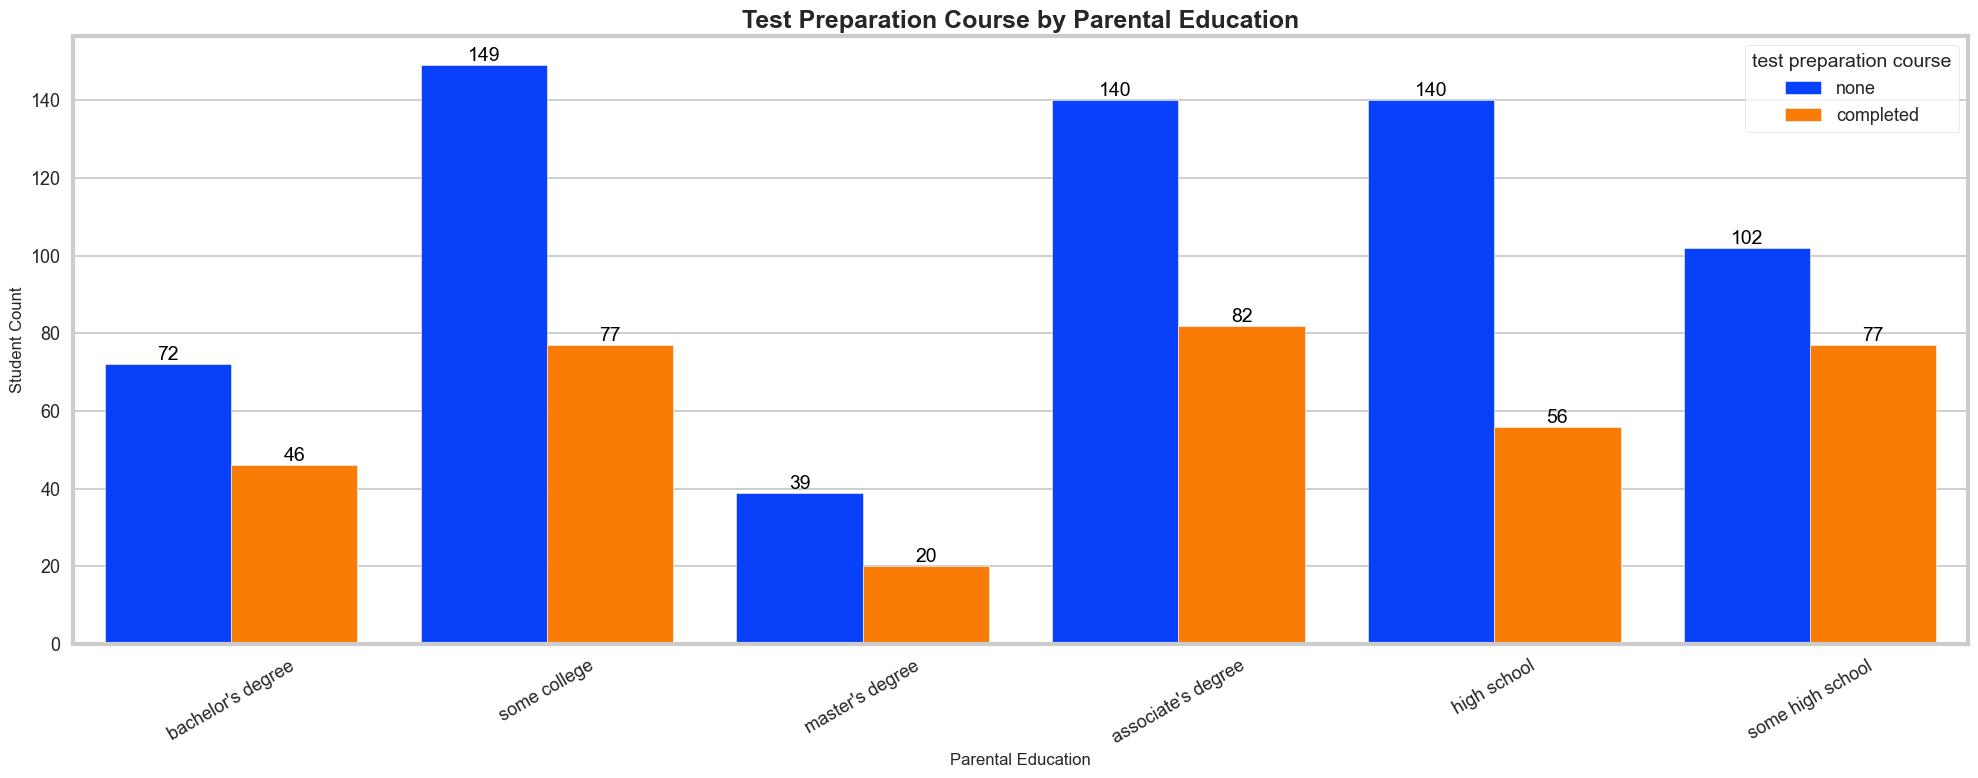

In [ ]:
f, ax = plt.subplots(figsize=(20, 8))

#Test Prep Course vs Parental Education
sns.countplot(x='parental level of education', data=df, palette='bright',
              hue='test preparation course', saturation=0.95, ax=ax)
ax.set_title('Test Preparation Course by Parental Education', fontsize=18, fontweight='bold')
ax.set_xlabel('Parental Education', fontsize=12)
ax.set_ylabel('Student Count', fontsize=12)
ax.tick_params(axis='x', rotation=30)

for container in ax.containers:
    ax.bar_label(container, color='black', size=14)

plt.tight_layout()
plt.show()


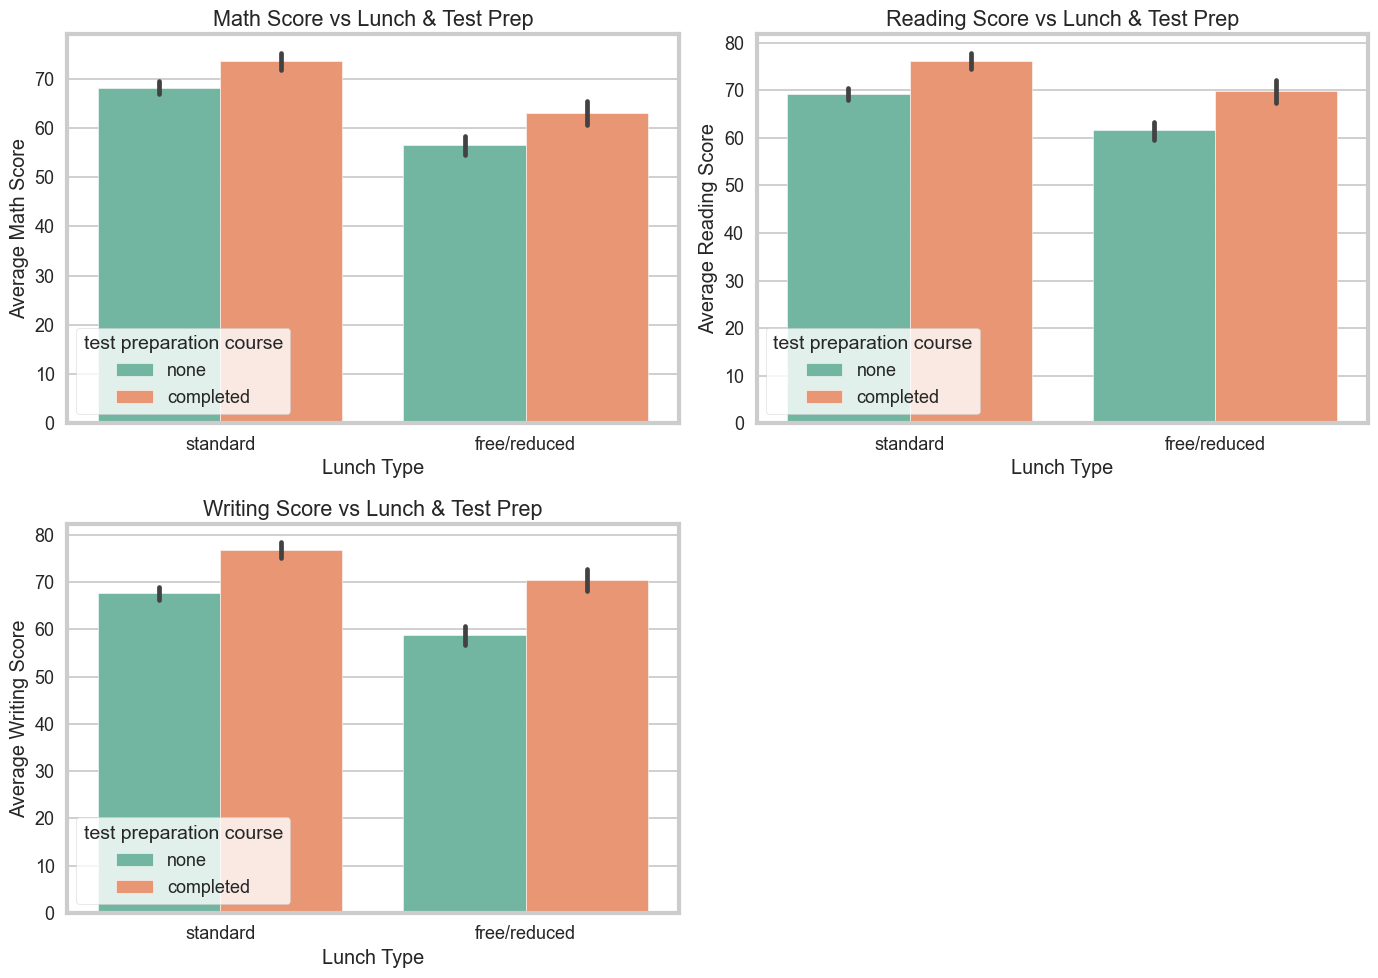

In [35]:
# Set up the figure
plt.figure(figsize=(14, 10))

# Math Score Plot
plt.subplot(2, 2, 1)
sns.barplot(x='lunch', y='math score', hue='test preparation course', data=df)
plt.title('Math Score vs Lunch & Test Prep')
plt.xlabel('Lunch Type')
plt.ylabel('Average Math Score')

# Reading Score Plot
plt.subplot(2, 2, 2)
sns.barplot(x='lunch', y='reading score', hue='test preparation course', data=df)
plt.title('Reading Score vs Lunch & Test Prep')
plt.xlabel('Lunch Type')
plt.ylabel('Average Reading Score')

# Writing Score Plot
plt.subplot(2, 2, 3)
sns.barplot(x='lunch', y='writing score', hue='test preparation course', data=df)
plt.title('Writing Score vs Lunch & Test Prep')
plt.xlabel('Lunch Type')
plt.ylabel('Average Writing Score')

# Layout adjustment
plt.tight_layout()
plt.show()


#### Insights  
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course.

#### 4.4.6 Checking Outliers

Plotting boxplots for Math, Reading, Writing, and Average scores to visually analyze the spread, central tendency, and outliers of student performance. An excellent way to check score distribution and detect anomalies!

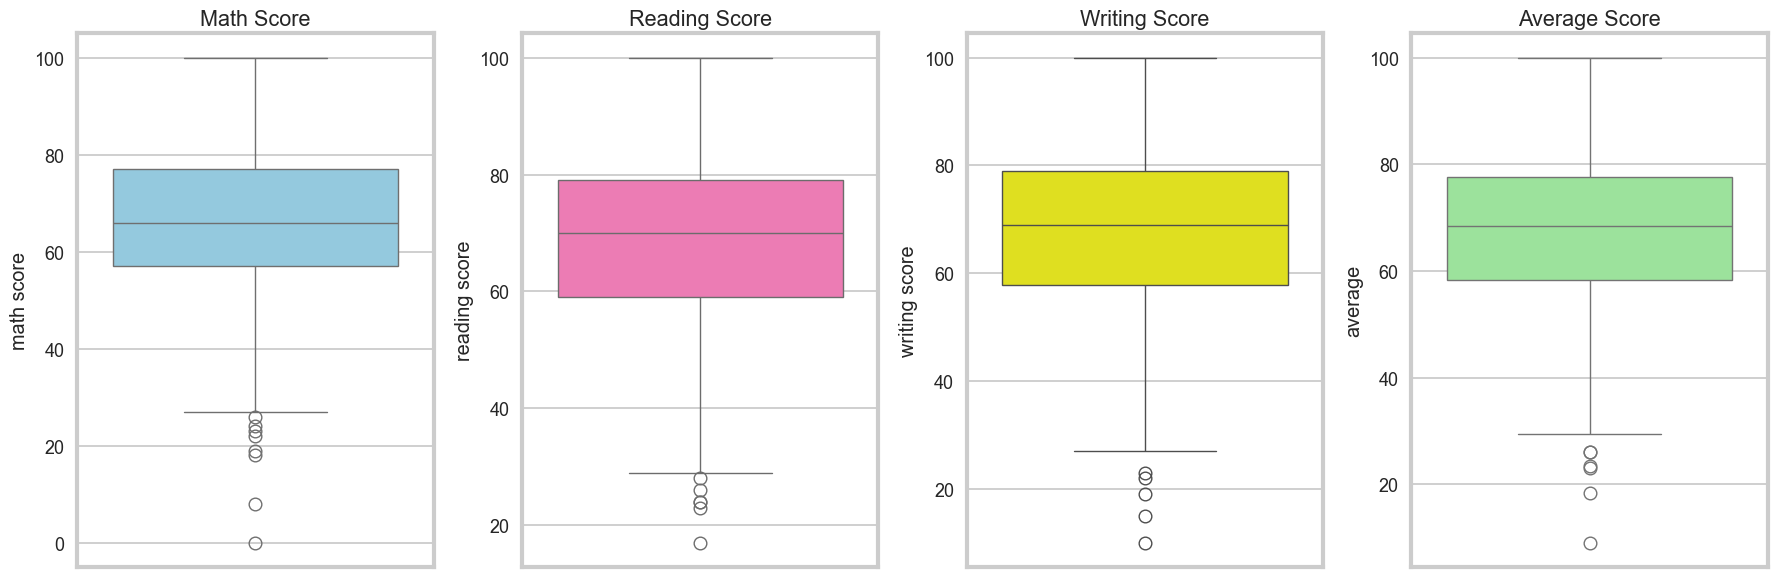

In [ ]:
# Set up figure and subplots
fig, axes = plt.subplots(1, 4, figsize=(18, 6))

# Plot 1: Math Score
sns.boxplot(y='math score', data=df, ax=axes[0], color='skyblue')
axes[0].set_title('Math Score')

# Plot 2: Reading Score
sns.boxplot(y='reading score', data=df, ax=axes[1], color='hotpink')
axes[1].set_title('Reading Score')

# Plot 3: Writing Score
sns.boxplot(y='writing score', data=df, ax=axes[2], color='yellow')
axes[2].set_title('Writing Score')

# Plot 4: Average Score
sns.boxplot(y='average', data=df, ax=axes[3], color='lightgreen')
axes[3].set_title('Average Score')

plt.tight_layout()
plt.show()

#### 4.4.7 Multivariate Analysis using PAIRPLOT

To visualize pairwise relationships between all numerical variables in the DataFrame, color-coded by gender.

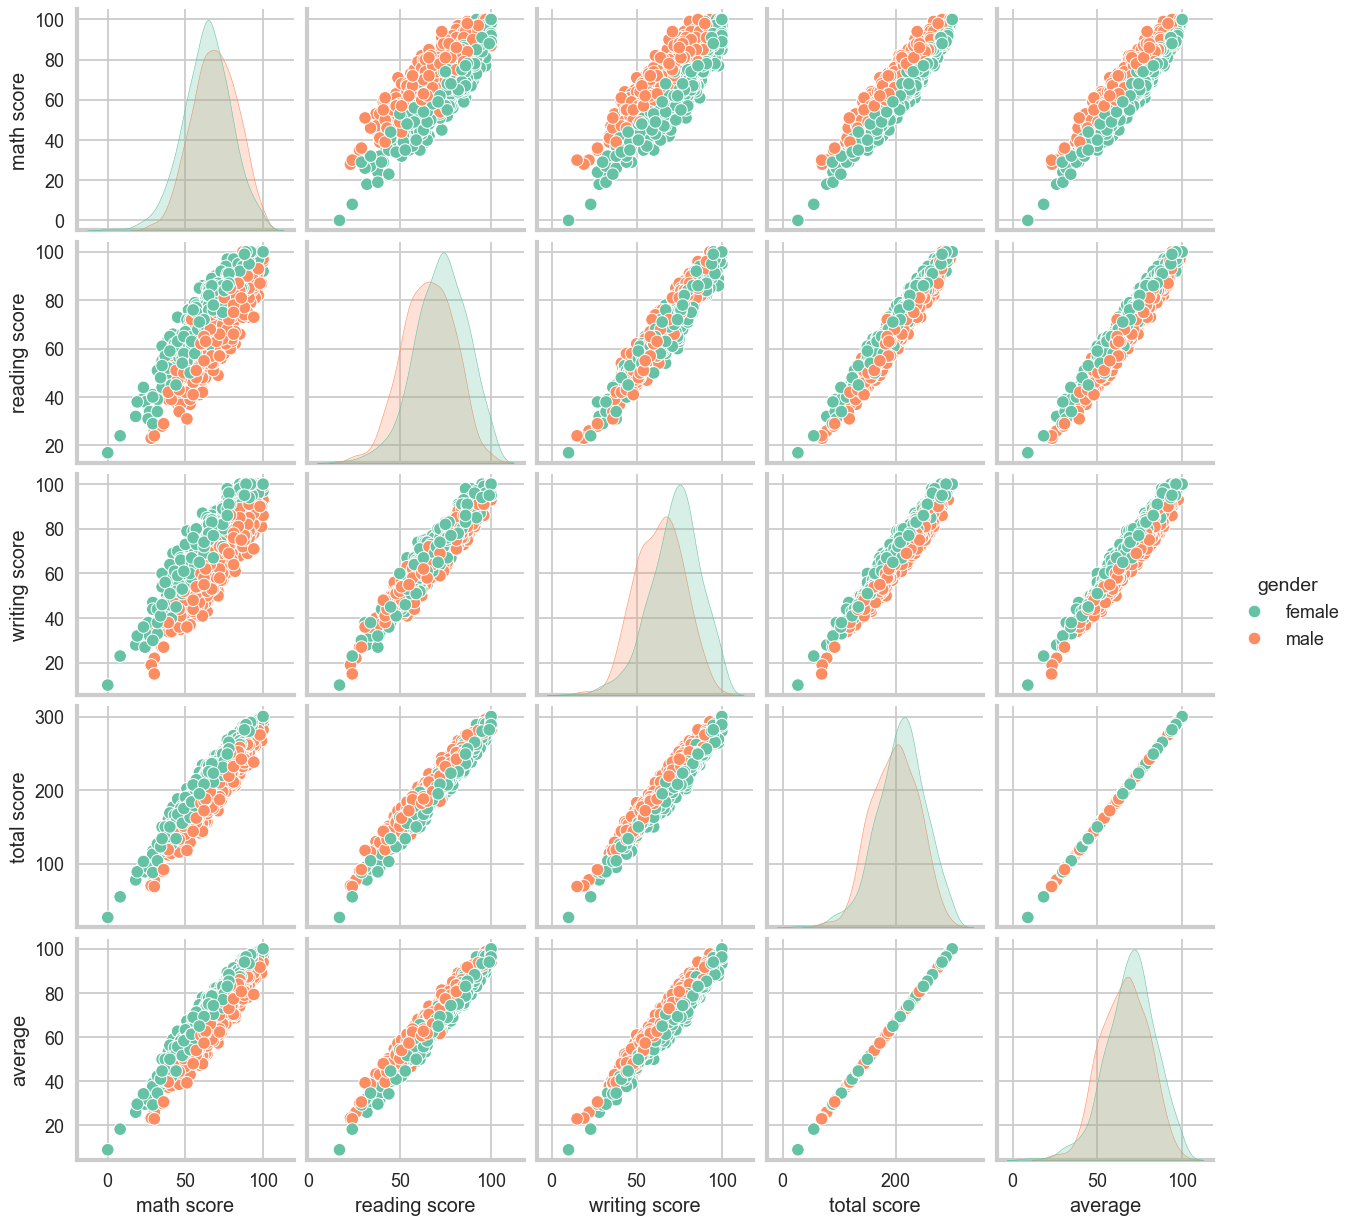

In [ ]:
sns.pairplot(df, hue = 'gender')
plt.show()

#### Insights
- From the above plot it is clear that all the scores increase linearly with each other.

### 5. Conclusions
- Student performance is related to lunch, race and parent's level of education.
- Female students lead in passing percentage and also get the highest marks.
- Student performance is not much related to the preparation course taken for the exam.
- Completing the preparation course is beneficial.